<a href="https://colab.research.google.com/github/yogeshkumar22/NFL_2018/blob/main/Analyzing%20the%20NFL%20games/Analyzing_the_NFL_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the NFL games

The first dataset that we will be looking is the dataset containing information about the NFL games. Such kind of datasets are very helpful in giving us an idea about how a sport's season was/will be played out.

This dataset contains the following information:

- gameId: Game identifier, unique (numeric)

- gameDate: Game Date (time, mm/dd/yyyy)

- gameTimeEastern: Start time of game (time, HH:MM:SS, EST)

- homeTeamAbbr: Home team three-letter code (text)

- visitorTeamAbbr: Visiting team three-letter code (text)

- week: Week of game (numeric)

Let us start by importing the necessary libraries,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

Next, importing the CSV file called `games.csv` which contains information about the games.

In [5]:
# Reading in the CSV file as a DataFrame 
games_df = pd.read_csv('games.csv')

In [6]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


Let us look at the shape of the DataFrame to determine how many games were played out in the 2018 NFL season.

In [7]:
# Viewing the shape of the DataFrame
games_df.shape

(253, 6)

Before we begin our analysis, let us convert the date and time columns to Pandas datetime values. This will help to standarize such data across the multiple datasets that we work with and it will also help us use ready-made functions.

In [8]:
# Converting to datetime.date values
games_df['gameDate'] = pd.to_datetime(games_df['gameDate']).dt.date

# Converting to datetime.time values
games_df['gameTimeEastern'] = pd.to_datetime(games_df['gameTimeEastern']).dt.time

# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


Now, let us understand how the games are distributed in accordance to the date, time, day and the week.

Starting the analysis by looking at the distribution of games in relation to the game dates.

In [9]:
# Checking the frequency of games in relation to game dates
# games_df['gameDate'].value_counts().reset_index()

games_df['gameDate'].value_counts().reset_index()

,index,gameDate
0,2018-12-30,16
1,2018-12-02,14
2,2018-09-16,14
3,2018-12-09,14
4,2018-09-23,14
5,2018-12-23,13
6,2018-09-30,13
7,2018-10-07,13
8,2018-10-14,13
9,2018-12-16,12


There were a total of 50 different game dates.

In [10]:
# Checking the frequency of games in relation to game dates
date_dist = games_df['gameDate'].value_counts().reset_index()

# Renaming the columns
date_dist.columns = ['date', 'frequency']

# Looking at the first five rows
date_dist.head()

,date,frequency
0,2018-12-30,16
1,2018-12-02,14
2,2018-09-16,14
3,2018-12-09,14
4,2018-09-23,14


Next, sorting the data based on the date and setting the index as the date.

In [11]:
# Sorting the DataFrame based on the date values
sorted_date_dist = date_dist.sort_values('date').set_index('date')

# Looking at the first five rows
sorted_date_dist.head()

,frequency
date,
2018-09-06,1
2018-09-09,10
2018-09-10,2
2018-09-13,1
2018-09-16,14


Let us plot the distribution using a bar plot.

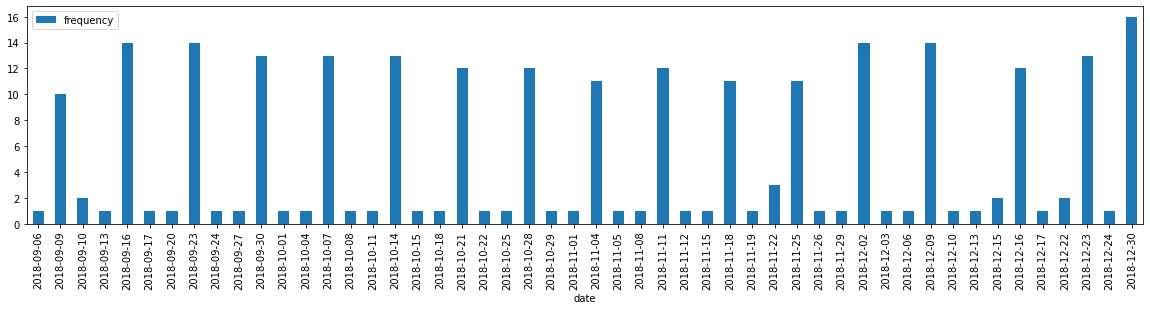

In [12]:
# Plotting a bar plot
sorted_date_dist.plot(kind='bar', figsize=(20,4))

We can do the same analysis for the time, day and week as well. So, let us convert our code to a Python function.

True

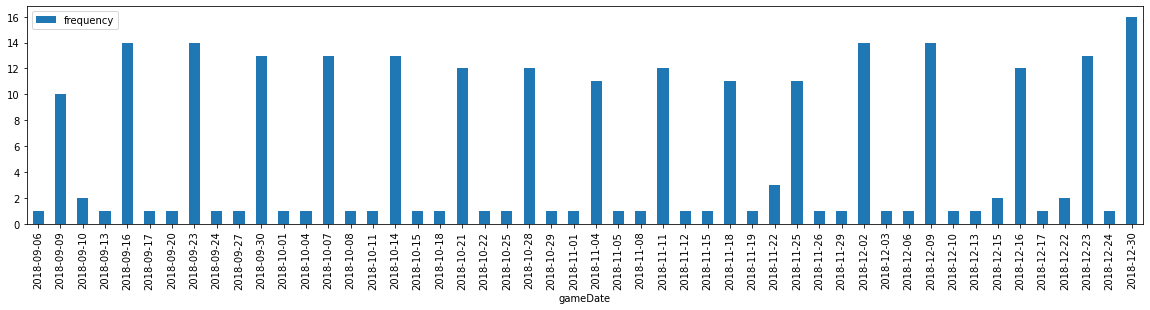

In [13]:
def find_dist(df, col_name):
    
    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()
    
    # Renaming the columns
    dist.columns = [col_name, 'frequency']
        
    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

# Visualizing the frequency distribution of games in relation to the date
find_dist(games_df, 'gameDate')

Let us visualize the frequency distribution of games in relation to time and week number.

In [14]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


True

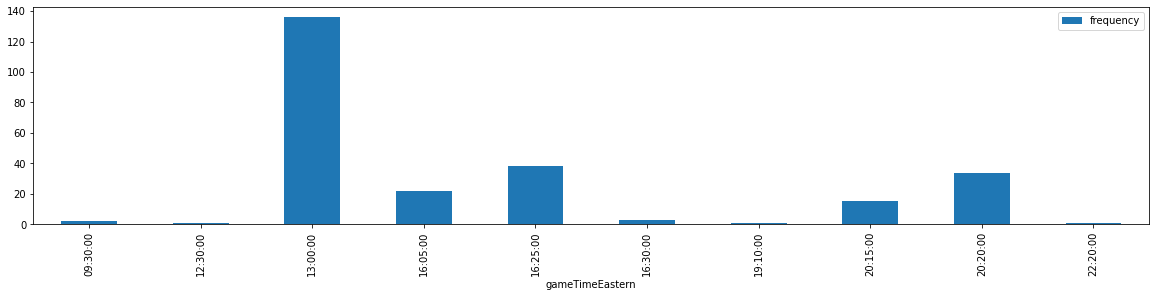

In [15]:
# Visualizing frequency distribution of games in relation to the time
find_dist(games_df, 'gameTimeEastern')

True

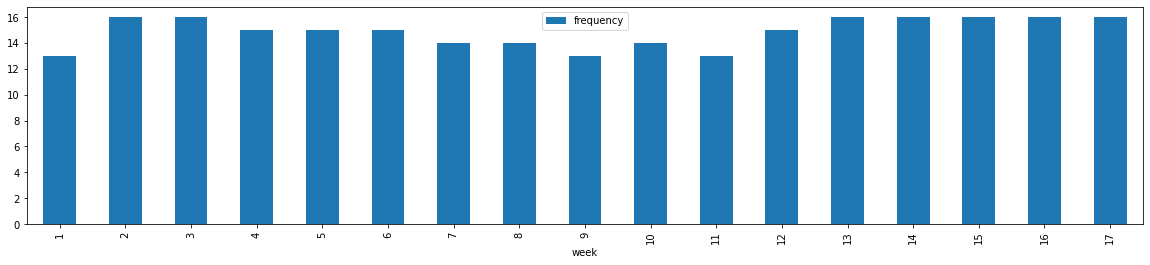

In [16]:
# Visualizing frequency distribution of games in relation to the week
find_dist(games_df, 'week')

Finally, let us look at how the games are distributed in relation to the game days. For this, we will have to convert the dates to which day they fall in the week. 

In [17]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


In [18]:
# Creating a column containing the day of the week information extracted from the date
games_df['gameDay'] = games_df['gameDate'].apply(lambda x: x.strftime('%A'))

# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameDay
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1,Thursday
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1,Sunday
2,2018090902,2018-09-09,13:00:00,IND,CIN,1,Sunday
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1,Sunday
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1,Sunday


Visualizing the game distribution in relation to the game day. 

True

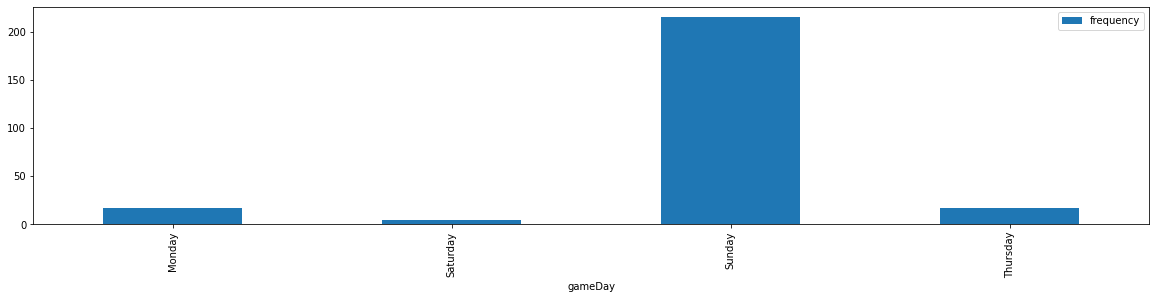

In [19]:
# Visualizing frequency distribution of games in relation to the day of the week
find_dist(games_df, 'gameDay')